In [48]:
import torchvision 
import torch
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=120)

In [2]:
#extracting and transforming the fashion MNIST data set
train_set=torchvision.datasets.FashionMNIST(
    root ='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



/home/favas/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [42]:
# loading the transformed training set to loader
train_loader=torch.utils.data.DataLoader(
    train_set,
    batch_size=20
)


In [14]:
# Check the basics of the data set
print(len(train_set))
print(train_set.train_labels)
print(train_set.train_labels.bincount())

60000
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


2 <class 'tuple'>
torch.Size([1, 28, 28]) 9
label 9


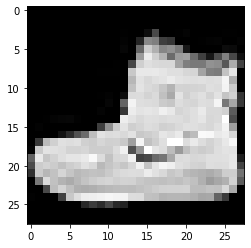

In [24]:
# Check a sample from the data set
sample=next(iter(train_set))
print(len(sample), type(sample))
image,label=sample[0],sample[1]
print(image.shape)
plt.imshow(image.squeeze(),cmap='gray')
print('label',label)

/home/favas/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [43]:
# Creating the batch
batch=next(iter(train_loader))
images,labels=batch
print(images.shape,labels.shape)

torch.Size([20, 1, 28, 28]) torch.Size([20])


labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4])


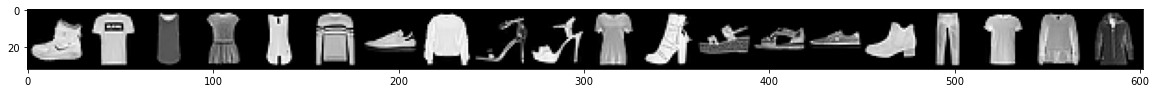

In [47]:
# looking at the sample batchin grid
grid =torchvision.utils.make_grid(images,nrow=20)  #nrow gives the no of images in the row

plt.figure(figsize=(20,20))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

Building the model

In [49]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1= nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2= nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        t =self

In [50]:
network=Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)